# Dilworth's theorem

## Partially ordered sets

A possible generation for bipartite graphs is partially ordered set.

**Def.**
A *partially ordered set* (poset) is a set $S$ with a relation $\leqslant $ on $S$ satisfying:
- **(reflexivity).** $ a \leqslant a$ for all $a \in S$ 
- **(antisymmetry).** if $a\leqslant b$ and $b\leqslant a$, then $a=b$ 
- **(transitivity).** if $a\leqslant b$ and $b \leqslant c$, then $a\leqslant c$

**Def.**
In a poset $S$, 
1. A *chain* is a subset of $S$, in which every two elements are comparable
2. An *antichain* is a subset of $S$, in which every two elements are not comparable

**Dilworth's theorem.**
In any finite partially ordered set, the largest antichain has the same size as the smallest chain decomposition.

**Lemma 1.** For a finite partially ordered set $P$ with a chain decomposition $\mathcal{C} = \{C_1,\cdots,C_l\}$ of $P$,
1. Any antichain $A$ of $P$ with $|A| = m$ satisfies $\forall C_i \in \mathcal{C}$, $|A \bigcap C_i| \leqslant 1$, so $l \leqslant m$
2. For any subset $\mathcal{S} \subseteq \mathcal{C}$, the set $\mathcal{A}_\mathcal{S}= \{ \text{antichain }A |\forall C \in \mathcal{S}, C \bigcap A \neq \emptyset \}$ is either empty or containing a maximal element $M_\mathcal{S}$ satisfying
$$
    \forall C \in \mathcal{S}, C \bigcap M_\mathcal{S} = \max\limits_{A \in \mathcal{A}_\mathcal{S}} C \bigcap A.
$$

**Proof of Lemma 1.**
1. If $x,y \in C \bigcap A$ for some $C \in \mathcal{C}$, then either $x \leqslant y$ or $y \leqslant x$, which is a contradiction since $A$ is an antichain.
2. If there exists $C_1$ and $C_2$ in $\mathcal{S}$, such that
$$
    \max\limits_{A \in \mathcal{A}_\mathcal{S}} C_1 \bigcap A \geqslant \max\limits_{A \in \mathcal{A}_\mathcal{S}} C_2 \bigcap A,
$$
then, $\forall A' \in \mathcal{A}_\mathcal{S}$,
$$
    \max\limits_{A \in \mathcal{A}_\mathcal{S}} C_1 \bigcap A \geqslant a',
$$
where $\{a'\} = C_2 \bigcap A'$. Hence, $\forall A' \in \mathcal{A}_\mathcal{S}$,
$$
    \max\limits_{A \in \mathcal{A}_\mathcal{S}} C_1 \bigcap A \notin A',
$$
which is a contradiction, since $C_1$ is a totally ordered set.
<p style="text-align:right;">&#9632; </p>

**Proof 1.**
We use induction on the size of the poset.
- For the empty poset, the conclusion holds obviously.
- Assume the conclusion holds for any poset with no more than $n$ elements and $P$ is a nonempty poset of $(n + 1)$ elements with any maximal element $m$ in $P$, then $P \setminus \{m\}$ has a largest antichain $A$ and a smallest chain decomposition $\mathcal{C}$ such that $|A| = |\mathcal{C}| = l$. By **Lemma 1**, we can assume that $A$ is a maximal antichain in $\mathcal{A}_\mathcal{C}$, such that
$$
    \forall C \in \mathcal{C}, C \bigcap A = \max\limits_{A' \in \mathcal{A}_\mathcal{C}} C \bigcap A'.
$$
  Notice that,
    * If $A \bigcup \{m\}$ is an antichain in $P$, then $\mathcal{C} \bigcup \{\{m\}\}$ is a chain decomposition of $P$ and both of them has a size of $(l + 1)$
    * Otherwise, $\exists a\in A$, such that $a \leqslant m$. Let $a \in C$ for some $C \in \mathcal{C}$ and
    $$
        C^{\leqslant a} := \{a' \in C \mid a'\leqslant a\}.
    $$
      Then, $P' := P \setminus (\{m\} \bigcup C^{\leqslant a})$ is a poset with less than $n$ elements. Any antichain $\tilde{A}$ of $P'$ is an antichain of $P\setminus \{m\}$, but $\tilde{A} \bigcap C \subseteq C^{\leqslant a}$, so $\tilde{A} \bigcap C = \emptyset$, thus $|\tilde{A}| \leqslant l - 1$. By induction hypothesis, $P'$ has a chain decomposition of $l - 1$ chains. Notice that $\{m\} \bigcup C^{\leqslant a}$ is also a chain, so $P$ has a chain decomposition of $l$ chains.
<p style="text-align:right;">&#9632; </p>

The following proof is much easier and provides effective algorithms to find a minimal chain decomposition and a maximal antichain.

**Proof 2.** (Using Kőnig's theorem)
From a finite poset $P$ of $n$ elements, we can construct a bipartite graph $B_P = (P_s \sqcup P_t, E)$ where $P_s \cong P_t \cong P$ and an edge $(x,y)\in E$ if and only if $x < y \in P$, i.e., regarded as elements in $P$, $x \leqslant y$ and $x \neq y$. By Kőnig's theorem, $B_P$ has a maximal matching $M$ and a minimal vertex cover $VC$ sharing the same size, denoted by $|M| = ||VC| = l$. 
- There is a one-to-one correspondence between matchings on $B_P$ and chain decompositions in $P$. Two elements are paired in the matching if and only if they are adjacent in some chain of the corresponding chain decomposition. Thus, the minimal chain decomposition has the size of $n - l$ (each unmatched element in $P_s$ is the maximal element of some chain and vice verse).
- Given a minimal vertex covers $S \sqcup T$ on $B_P$ with $S \subseteq P_s$ and $T \subseteq P_t$, $P \setminus (S \bigcup T)$ is antichains in $P$ with at least $n - l$ elements. (In fact, $S \bigcap T = \emptyset$ if $S \sqcup T$ is a minimal vertex cover. Think about why.)

Hence, Dilworth's theorem holds.
<p style="text-align:right;">&#9632; </p>



Text(value='', continuous_update=False, description='Input array', placeholder='Input a 2D list like [[0,],[2,…

Output()

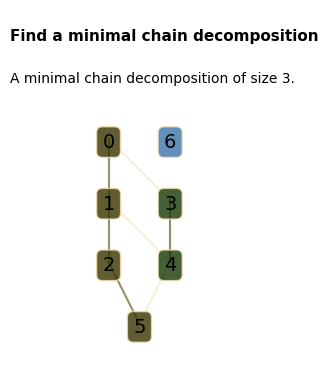

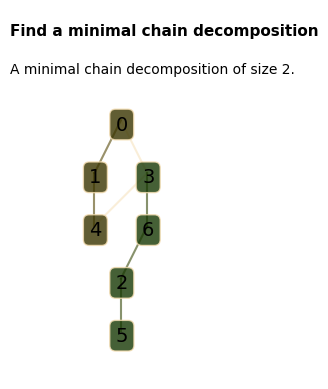

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "jshtml"
import matplotlib.animation
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import random
import matplotlib.patches as patch
from IPython.display import display,clear_output
from celluloid import Camera
from collections import defaultdict

class Poset(object):
    
    def __init__(self, data):
        # Number of elements
        self._n = len(data)
        
        # Restore the graph as two dictionaries
        self._graphD = {_:set() for _ in range(self._n)}
        self._graphR = {_:set() for _ in range(self._n)}
        for u in range(self._n):
            for v in data[u]:
                if v == u:
                    continue
                if v not in self._graphD:
                    raise Exception("Sorry, but the set " + f"{set(range(self._n))}" + " doesn't contain an element indexed by "+f'{v}.')
                else:
                    for u0 in self._graphR[u].union({u}):
                        for v0 in self._graphD[v].union({v}):
                            if u0 in self._graphD[v0]:
                                raise Exception(f"Sorry, but {u0} < {v0} and {v0} < {u0} at the same time, which is not allowed.")
                            else:
                                self._graphD[u0].add(v0)
                                self._graphR[v0].add(u0)
        count = {u:len(self._graphR[u]) for u in range(self._n)}
        
        # Prepare the hess diagram of the poset
        self._hessD = []
        stack = []
        for i in range(self._n):
            if count[i] == 0:
                stack.append(i)
        while stack:
            self._hessD.append([])
            for _ in range(len(stack)):
                ind = stack.pop(0)
                self._hessD[-1].append(ind)
                for u in self._graphD[ind]:
                    count[u] -= 1
                    if count[u] == 0:
                        stack.append(u)
                        
        # Restore chain decomposition
        self._next = list(range(self._n))
        self._prev = list(range(self._n))
        self._indexOfChains = list(range(self._n))
        
        # Restore color data for drawing
        self._boxColors = [
            '#3a3500', '#d9dfcc', '#416000', '#173803', '#b1ba9b', '#cbbeb5', '#3b75a9', '#a30000', '#a30000', '#3fb59e', '#d7e7d8', '#f08080', '#c39797', '#b000b5', '#facade', '#ffc3a0', '#516458', '#69453a', '#bcc499', '#f8d110', '#6a329f', '#bcc499', '#516458', '#69453a', '#9c7c4f', '#ffb6c1', '#ffc3a0', '#bada55', '#794044', '#ff4040', '#133337', '#065535', '#ff80ed', '#92a8d1', '#f7cac9', '#16363d', '#d7e7d8', '#3fb59e', '#5accd0', '#046e70', '#bab55e', '#b1ba9b']        
        self._initColors = '#F5DEB3'
        self._hintColors = {
            'u':'#C0C0C0', 'U': '#000000', 'v':'#00BFFF', 'V':'#0000FF', 'newln': '#800000', 'oldln': '#C0C0C0'
        }
        
        # Initialize drawing data
        self.size = {'x': max(len(row) for row in self._hessD), 'y': len(self._hessD)}
        self.fig,self.ax = plt.subplots()
        self.camera = Camera(self.fig)
        self.ax.set_axis_off()
        self.ax.set_xlim(-(self.size['x'] // 2) - 1,max((self.size['x'] // 2) + 1,-(self.size['x'] // 2) +4))
        self.ax.set_ylim(-0.5,self.size['y'] + 1.5)
        self.ax.set_aspect('equal')
        self.hintText = {
            'x': - (self.size['x'] // 2) - 1, 
            'y': self.size['y'] + 0.5, 
            'text':'The Hasse diagram of this poset is drawn.'
        }
        self.path = {}
        self.newArrow = {}
        self.delArrow = {}
        self.draw()
        
    def BFS(self,u0):
        self.path = {}
        stack = [u0]
        while stack:
            u = stack.pop(0)
            for v in self._graphR[u]:
                if v not in self.path:
                    self.path[v] = u
                    if self._prev[v] == v:
                        return v
                    else:
                        stack.append(self._prev[v])
        return None
    
    def adjust(self,u,v):
        self.newArrow = {}
        self.delArrow = {}
        v1 = v
        u1 = self.path[v1]
        while u != u1:
            self.newArrow[v1] = u1
            v1 = self._next[u1]
            self.delArrow[v1] = u1
            u1 = self.path[v1]
        self.newArrow[v1] = u
        self.draw(True)
        
        u1 = self.path[v]
        while u != u1:
            end = self._indexOfChains[v]
            v1 = self._next[u1]
            self._next[u1] = v
            self._prev[v] = u1
            w = u1
            self._indexOfChains[w] = end
            while self._prev[w] != w:
                w = self._prev[w]
                self._indexOfChains[w] = end
            v = v1
            u1 = self.path[v]
        end = self._indexOfChains[v]
        self._next[u1] = v
        self._prev[v] = u1
        w = u1
        self._indexOfChains[w] = end
        while self._prev[w] != w:
            w = self._prev[w]
            self._indexOfChains[w] = end
        self.draw()
        
        
    def draw(self,change = False):
        x,y,text = self.hintText['x'],self.hintText['y'],self.hintText['text']
        title = self.ax.text(
            x, y +0.5,
            'Find a minimal chain decomposition', 
            fontsize = 11,
            weight='bold')
        self.ax.text(x,y,text,fontsize = 10,va = 'top')
        
        boxes = {_:{'x':None, 'y':None, 'box':None,'props':None} for _ in range(self._n)}
        y = self.hintText['y']
        for i in range(len(self._hessD)):
            y -= 1
            x = - (len(self._hessD[i]) - 1)/2
            for j in range(len(self._hessD[i])):
                ele = self._hessD[i][j]
                boxes[ele]['x'] = x
                boxes[ele]['y'] = y
                x += 1
        for i in range(1,len(self._hessD)):
            row = self._hessD[i]
            for v in row:
                for u in self._hessD[i-1]:
                    if v in self._graphD[u]:
                        x1,y1 = boxes[u]['x'],boxes[u]['y']
                        x2,y2 = boxes[v]['x'],boxes[v]['y']
                        self.ax.plot(np.array([x1,x2])+0.1,np.array([y1,y2])-0.1, color = self._initColors, zorder = 0,alpha=0.5)
                        
        for ele in range(self._n): 
            end = self._indexOfChains[ele]
            x,y = boxes[ele]['x'],boxes[ele]['y']
            props = dict(boxstyle='round', facecolor=self._boxColors[end], edgecolor=self._initColors, alpha=0.8)
            box = self.ax.text(x, y, ele, fontsize=14, verticalalignment='top', bbox=props, zorder= 10)
            boxes[ele]['box'] = box
            boxes[ele]['props'] = props
            u = ele
            v = self._next[u]
            if u != v:
                x1,y1 = boxes[u]['x'],boxes[u]['y']
                x2,y2 = boxes[v]['x'],boxes[v]['y']
                self.ax.plot(np.array([x1,x2])+0.1,np.array([y1,y2])-0.1, color = self._boxColors[end], zorder = 5,alpha=0.5)
            
        if change:
            for v in self.newArrow:
                u= self.newArrow[v]
                x1,y1 = boxes[u]['x'],boxes[u]['y']
                x2,y2 = boxes[v]['x'],boxes[v]['y']
                self.ax.plot(np.array([x1,x2])+0.1,np.array([y1,y2])-0.1, color = self._hintColors['newln'], linewidth= 3, zorder = 7,alpha=0.3)
            for v in self.delArrow:
                u= self.delArrow[v]
                x1,y1 = boxes[u]['x'],boxes[u]['y']
                x2,y2 = boxes[v]['x'],boxes[v]['y']
                self.ax.plot(np.array([x1,x2])+0.1,np.array([y1,y2])-0.1, color = 'w', linewidth= 3, zorder = 6,alpha=1)
        
                self.ax.plot(np.array([x1,x2])+0.1,np.array([y1,y2])-0.1, color = self._hintColors['oldln'], linewidth= 3, zorder = 7,alpha=0.6,dashes = [1,1])
            
        
        self.camera.snap()
        
def IOW(change):
    a = change['new']
    with output_w:
        
        clear_output()
        
        # check if the input is a 2D list ###
        if not a:
            print('Input is empty, try to input a 2D list')
            return
        try:
            data = eval(a)
        except:
            print("Illegal inputs")
            return
        try:
            if type(data) != list:
                print("Input should be like [[0,],[2,],[1,3,]]")
                return
            if not data:
                print('Input is empty, try to input a 2D list')
                return
            for girl in data:
                if type(girl) != list:
                
                    print("Input should be like [[0,],[2,],[1,3,]]")
                    for boy in girl:
                        if type(boy) != int:
                            raise Exception("Illegal inputs")
                    return
        except:
            print("Illegal inputs")
            return              
        try:
            p = Poset(data)
        except Exception as e:
            print(e)
            return
        for u in range(p._n):
            p.hintText['text'] = f"Run BFS starting from {u}."
            p.draw()
            v = p.BFS(u)
            if v is not None:
                p.hintText['text'] = f"The chain ending at {u} can be extended."
                p.adjust(u,v)
            else:
                p.hintText['text'] = f"The chain ending at {u} can't be extended."
                p.draw()
        p.hintText['text'] = f"A minimal chain decomposition of size {len(set(p._indexOfChains))}."
        p.draw()
        ani = p.camera.animate(interval = 1000)
        display(ani)
            
output_w = widgets.Output()
input_w = widgets.Text(
    value='',
    placeholder='Input a 2D list like [[0,],[2,],[1,3,]]',
    description='Input array',
    disabled=False,  
    continuous_update= False
)
display(input_w)
input_w.observe(IOW, names = 'value')
display(output_w)


